In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fanalysis.mca import MCA
from sklearn.decomposition import FactorAnalysis

In [2]:
df1= pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\1. Data Cleaning\MisClassification\Misclass_data\csv\2. Post-Merge-Posts\MisCl_Posts_joint_MCA_V4.csv")
df1 = df1.drop(df1.columns[0], axis=1)

In [3]:
df_mca= pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\2. Data Analysis\MCA\MisClassification\MCA_data_Misc\MisCl_postes_V6_EN.csv")
df_mca = df_mca.drop(df_mca.columns[0], axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_214924\1215820636.py:1: DtypeWarning: Columns (15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mca= pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\2. Data Analysis\MCA\MisClassification\MCA_data_Misc\MisCl_postes_V6_EN.csv")


In [4]:
df= pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\1. Data Cleaning\MisClassification\Misclass_data\csv\1. Pre-Merge-Posts\ZY_MisClass_V9.csv")
df = df.drop(df.columns[0], axis=1)

df['DATCON'] = pd.to_datetime(df['DATCON'])
df['DATFIN'] = pd.to_datetime(df['DATFIN'])

df['DEBESS'] = pd.to_datetime(df['DEBESS'],format='ISO8601')
df['FINESS'] = pd.to_datetime(df['FINESS'])

df['DATSOR'] = pd.to_datetime(df['DATSOR'])
df['DATENT'] = pd.to_datetime(df['DATENT'])
df['PHYSOR'] = pd.to_datetime(df['PHYSOR'])

df['DTCY01'] = pd.to_datetime(df['DTCY01'])
df['DTCY02'] = pd.to_datetime(df['DTCY02'])

df['DATAN1'] = pd.to_datetime(df['DATAN1'])
df['DATAN4'] = pd.to_datetime(df['DATAN4'])


# Treatments relative to Original DataBase

In [ ]:
cols_all = df.columns

cols_Date = []
cols_numeric = []
cols_obj = []
cols_bool = []
for col_name in cols_all:
    col_type = df[col_name].dtype
    if col_type == 'datetime64[ns]':
        cols_Date.append(col_name)
    elif col_type in ['int64', 'int32', 'float64','float32']:
        cols_numeric.append(col_name)
    elif col_type == 'object':
        cols_obj.append(col_name)
    elif col_type == 'bool':
        cols_bool.append(col_name)

In [15]:
## dd = df.drop_duplicates(keep='first', inplace=False, ignore_index=True)

In [6]:
df.values.shape

(60228, 48)

# MCA Treatments relative to Original DataBase

In [6]:
df_mca.iloc[:10000,:]

,MATCLE,QUALIT,TYPCON,NATCON,CODENT,CODSOR,IDCY00,Leave_Category,Leave_Reason,Transfer_Reason,...,RSSTDE,CONT_GRP_DUR,SEN_DUR_2,SEN_DUR_1,SEN_GRP_DUR,QUALIF,LIBQUA,LIBEMP,CLASSI,LIBTRA
0,001134,Mr,DI,TI,New Reccruit,Left,TWW,VOLUNT,ABN,Not Transferred,...,Unspecified,32 days 00:00:00,0 days,94213 days,32 days 00:00:00,EMP,Employé,Employé,EMP,Temps Plein
1,001134,Mr,DI,TI,New Reccruit,Left,TWW,VOLUNT,ABN,Not Transferred,...,Unspecified,1 days 00:00:00,0 days,96831 days,32 days 00:00:00,EMP,Employé,Employé,EMP,Temps Plein
2,001134,Mr,DI,TI,ReRecruited,Left,TWW,VOLUNT,ABF,Not Transferred,...,Unspecified,32 days 00:00:00,0 days,94213 days,1 days 00:00:00,EMP,Employé,Employé,EMP,Temps Plein
3,001134,Mr,DI,TI,ReRecruited,Left,TWW,VOLUNT,ABF,Not Transferred,...,Unspecified,1 days 00:00:00,0 days,96831 days,1 days 00:00:00,EMP,Employé,Employé,EMP,Temps Plein
4,001135,Mr,DI,TI,New Reccruit,Left,TWW,VOLUNT,DEM,Not Transferred,...,Unspecified,199 days 00:00:00,0 days,94213 days,199 days 00:00:00,EMP,Employé,Employé,EMP,Temps Plein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,008094,Mr,DI,TI,New Reccruit,Left,TWW,VOLUNT,DEM,Not Transferred,...,Unspecified,89 days 00:00:00,0 days,94720 days,89 days 00:00:00,EMP,Employé,Employé,EMP,Temps Plein
9996,008094,Mr,DI,TI,New Reccruit,Left,TWW,VOLUNT,DEM,Not Transferred,...,Unspecified,825 days 00:00:00,0 days,94930 days,89 days 00:00:00,EMP,Employé,Employé,EMP,Temps Plein
9997,008094,Mr,DI,TI,New Reccruit,Left,TWW,VOLUNT,DEM,Not Transferred,...,Unspecified,825 days 00:00:00,0 days,94930 days,89 days 00:00:00,EMP,Employé,Employé,EMP,Temps Plein
9998,008094,Mr,DI,TI,New Reccruit,Left,TWW,VOLUNT,DEM,Not Transferred,...,Unspecified,4991 days 01:00:00,0 days,96545 days,89 days 00:00:00,EMP,Employé,Employé,EMP,Temps Plein


In [ ]:
df_mca[['SEN_DUR_1','SEN_DUR_2','CONT_GRP_DUR','SEN_GRP_DUR','ESS_DUR']] = df[['SEN_DUR_1','SEN_DUR_2','CONT_GRP_DUR','SEN_GRP_DUR','ESS_DUR']]

In [57]:
df_mca.drop(['SEN_DUR_1','SEN_DUR_2','CONT_GRP_DUR','SEN_GRP_DUR'],axis=1,inplace=True)

In [ ]:
df_mca.drop(['RSS','Contract_type'],axis=1,inplace=True)

In [59]:
df_mca.drop(['Entry_Reason'],axis=1,inplace=True)

In [60]:
#df_mca.drop(['LQUA'],axis=1,inplace=True) 
df_mca.drop(['QUA','QUALIFI'],axis=1,inplace=True)

### Treatments

In [66]:
libemp_dict = {}
 # the definition of the dict has been ommitted for confidentiality reasons

In [69]:
libTRA_dict = {}
# the definition of the dict has been ommitted for confidentiality reasons

In [67]:
df_mca['LIBEMP'] = df_mca['LIBEMP'].replace(libemp_dict)

In [70]:
df_mca['LIBTRA'] = df_mca['LIBTRA'].replace(libTRA_dict)

In [15]:
df_mca.to_csv("MisCl_postes_V6_EN.csv",sep=',',na_rep='NaN')

### MCA

In [16]:
df_mca.shape
# 12000 - 13 cols
# 12000:22000,:13

(95438, 18)

In [17]:
X = df_mca.iloc[:,1:].values

In [19]:
my_mca = MCA() 

In [20]:
len(X)

95438

In [ ]:
batch_size = 50000

for i in range(0, len(X), batch_size):
    batch_data = X[i:i+batch_size]
    my_mca.fit(batch_data)
    print(f'done {i}')

## 1. Eigen Statistics & Scree plots

In [80]:
eig = pd.DataFrame(my_mca.eig_)
eig

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,0.362013,0.293573,0.224425,0.185620,0.173900,0.161473,0.156217,0.153858,0.147715,0.138369,...,0.000058,0.000010,1.534322e-30,6.419406e-31,2.770738e-31,2.546835e-31,1.562191e-31,5.674621e-32,5.143988e-32,4.189900e-32
1,4.953862,4.017309,3.071085,2.540062,2.379687,2.209625,2.137710,2.105423,2.021367,1.893474,...,0.000800,0.000143,2.099599e-29,8.784450e-30,3.791536e-30,3.485142e-30,2.137735e-30,7.765271e-31,7.039141e-31,5.733548e-31
2,4.953862,8.971171,12.042256,14.582317,16.962004,19.171629,21.309339,23.414762,25.436128,27.329602,...,99.999857,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02


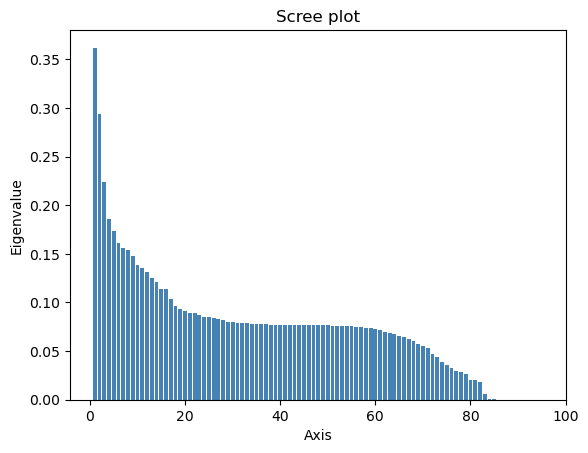

<Figure size 640x480 with 0 Axes>

In [81]:
my_mca.plot_eigenvalues()
plt.savefig("Scree_plot_MCA_Misclass.png")

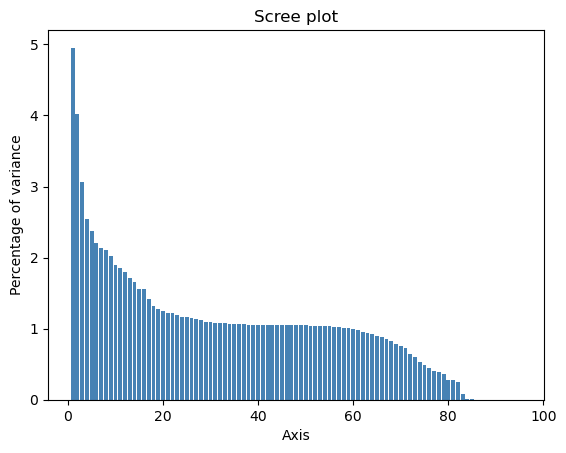

<Figure size 640x480 with 0 Axes>

In [82]:
my_mca.plot_eigenvalues(type="percentage")
plt.savefig("Scree_Perc_plot_MCA_Miscalss.png")

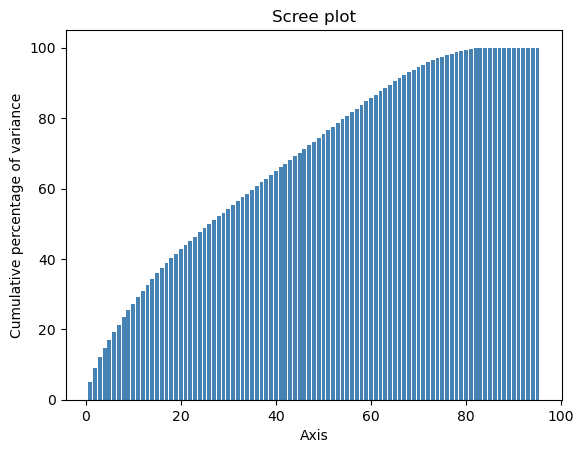

<Figure size 640x480 with 0 Axes>

In [83]:
my_mca.plot_eigenvalues(type="cumulative")
plt.savefig("Scree_plot_Cum_Perc_Var_MCA_Miscalss.png")

## 2. Statistics extraction Line point

In [84]:
df_rows = my_mca.row_topandas()

In [85]:
df_rows

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_coord_dim4,row_coord_dim5,row_coord_dim6,row_coord_dim7,row_coord_dim8,row_coord_dim9,row_coord_dim10,...,row_cos2_dim86,row_cos2_dim87,row_cos2_dim88,row_cos2_dim89,row_cos2_dim90,row_cos2_dim91,row_cos2_dim92,row_cos2_dim93,row_cos2_dim94,row_cos2_dim95
row0,-0.129100,0.669748,-0.279544,-0.510852,-0.108794,-0.118606,-0.059632,0.052491,-0.002320,0.042216,...,1.364295e-09,3.484181e-09,5.519331e-28,1.438352e-30,1.460859e-27,9.209236e-29,4.363000e-31,6.310070e-31,4.356440e-29,2.207936e-30
row1,-0.129100,0.669748,-0.279544,-0.510852,-0.108794,-0.118606,-0.059632,0.052491,-0.002320,0.042216,...,1.364295e-09,3.484181e-09,1.072090e-27,1.238377e-30,2.119985e-27,6.347477e-29,3.209470e-31,4.676982e-31,2.813912e-29,1.396853e-30
row2,-0.148793,0.656970,-0.184959,-0.469413,-0.121373,-0.132968,-0.081819,0.060718,-0.136302,0.154982,...,2.338064e-09,3.866620e-10,8.973904e-29,5.211356e-30,1.320631e-30,8.795201e-30,6.501981e-31,2.234308e-30,1.124460e-31,1.891635e-30
row3,-0.129100,0.669748,-0.279544,-0.510852,-0.108794,-0.118606,-0.059632,0.052491,-0.002320,0.042216,...,1.364295e-09,3.484181e-09,1.030333e-27,6.425563e-28,1.450861e-29,2.323291e-27,3.741600e-30,2.783130e-29,2.851585e-29,1.115348e-29
row4,-0.129100,0.669748,-0.279544,-0.510852,-0.108794,-0.118606,-0.059632,0.052491,-0.002320,0.042216,...,1.364295e-09,3.484181e-09,2.599524e-29,1.250309e-30,3.693420e-31,2.039428e-30,1.427004e-33,1.237643e-29,3.336790e-31,5.820719e-32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
row45433,0.163310,-0.030634,0.616267,0.416659,0.057144,-0.025673,-0.044986,0.030564,0.115807,0.870935,...,4.318514e-08,3.602347e-10,1.910129e-32,1.114977e-33,1.533933e-34,2.517221e-34,2.755844e-35,1.341138e-33,3.791223e-34,1.061730e-35
row45434,0.503621,0.037628,-0.227839,0.157544,0.062592,-0.008795,-0.096338,0.224919,0.219189,-0.045807,...,6.661354e-11,1.220618e-11,2.321218e-33,5.495313e-35,4.515955e-37,9.653183e-35,4.341321e-35,2.017505e-35,4.323131e-34,6.426038e-34
row45435,0.503621,0.037628,-0.227839,0.157544,0.062592,-0.008795,-0.096338,0.224919,0.219189,-0.045807,...,6.661354e-11,1.220618e-11,2.321218e-33,5.495313e-35,4.515955e-37,9.653183e-35,4.341321e-35,2.017505e-35,4.323131e-34,6.426038e-34
row45436,0.127738,-0.023992,0.608755,0.484815,-0.031071,-0.058227,0.010090,0.007658,0.171634,0.041814,...,2.211036e-09,4.535006e-10,5.216437e-34,4.781679e-34,6.450558e-35,4.010452e-36,4.182336e-34,2.707456e-34,1.449416e-34,4.067889e-34


In [86]:
my_mca.row_coord_

array([[-1.29099964e-01,  6.69747938e-01, -2.79544468e-01, ...,
        -1.43190903e-15,  1.18977322e-14, -2.67849934e-15],
       [-1.29099964e-01,  6.69747938e-01, -2.79544468e-01, ...,
        -1.23276747e-15,  9.56210717e-15, -2.13046110e-15],
       [-1.48792561e-01,  6.56970223e-01, -1.84959083e-01, ...,
         6.70894246e-15, -1.50506234e-15,  6.17307005e-15],
       ...,
       [ 5.03620730e-01,  3.76276444e-02, -2.27838553e-01, ...,
         9.01804599e-18, -4.17449867e-17,  5.08951969e-17],
       [ 1.27738195e-01, -2.39918544e-02,  6.08755179e-01, ...,
        -2.16883754e-17, -1.58687535e-17,  2.65846452e-17],
       [ 1.27738195e-01, -2.39918544e-02,  6.08755179e-01, ...,
        -2.16883754e-17, -1.58687535e-17,  2.65846452e-17]])

In [87]:
my_mca.row_contrib_

array([[1.01323190e-04, 3.36270002e-03, 7.66320597e-04, ...,
        7.95197109e-02, 6.05632593e+00, 3.76842765e-01],
       [1.01323190e-04, 3.36270002e-03, 7.66320597e-04, ...,
        5.89394754e-02, 3.91190296e+00, 2.38409914e-01],
       [1.34591940e-04, 3.23561415e-03, 3.35474892e-04, ...,
        1.74562949e+00, 9.69147409e-02, 2.00161019e+00],
       ...,
       [1.54192699e-03, 1.06140082e-05, 5.09053143e-04, ...,
        3.15405184e-06, 7.45571868e-05, 1.36060071e-04],
       [9.91969145e-05, 4.31512111e-06, 3.63407623e-03, ...,
        1.82430723e-05, 1.07737399e-05, 3.71226379e-05],
       [9.91969145e-05, 4.31512111e-06, 3.63407623e-03, ...,
        1.82430723e-05, 1.07737399e-05, 3.71226379e-05]])

In [88]:
my_mca.row_cos2_

array([[5.12927027e-03, 1.38046726e-01, 2.40494498e-02, ...,
        6.31007031e-31, 4.35643985e-29, 2.20793574e-30],
       [5.12927027e-03, 1.38046726e-01, 2.40494498e-02, ...,
        4.67698172e-31, 2.81391229e-29, 1.39685253e-30],
       [1.09899896e-03, 2.14252655e-02, 1.69818956e-03, ...,
        2.23430767e-30, 1.12445951e-31, 1.89163461e-30],
       ...,
       [6.29211846e-02, 3.51239829e-04, 1.28778725e-02, ...,
        2.01750484e-35, 4.32313052e-34, 6.42603805e-34],
       [9.39180219e-03, 3.31310364e-04, 2.13300918e-01, ...,
        2.70745615e-34, 1.44941588e-34, 4.06788928e-34],
       [9.39180219e-03, 3.31310364e-04, 2.13300918e-01, ...,
        2.70745615e-34, 1.44941588e-34, 4.06788928e-34]])

## 3.Statistics extraction Column point

In [89]:
df_cols = my_mca.col_topandas()

In [90]:
df_cols

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_coord_dim5,col_coord_dim6,col_coord_dim7,col_coord_dim8,col_coord_dim9,col_coord_dim10,...,col_cos2_dim86,col_cos2_dim87,col_cos2_dim88,col_cos2_dim89,col_cos2_dim90,col_cos2_dim91,col_cos2_dim92,col_cos2_dim93,col_cos2_dim94,col_cos2_dim95
col0_Miss,-0.084396,0.310046,-0.499771,0.220802,-0.035032,0.193561,-0.460559,0.149178,-0.927871,0.483895,...,1.772019e-12,4.612666e-12,3.006709e-32,0.000000e+00,3.655647e-31,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
col0_Mr,0.542088,-0.816313,0.389804,0.363770,-0.025579,-0.080553,0.011619,0.064273,0.222729,-0.064968,...,2.777010e-12,4.554512e-13,7.725963e-32,4.959737e-62,9.393458e-31,5.085594e-60,2.841526e-61,7.765264e-62,2.572415e-61,1.176703e-62
col0_Mrs,-0.151380,0.203459,-0.050057,-0.138735,0.012367,-0.001745,0.058186,-0.039264,0.057408,-0.045300,...,5.376241e-12,5.816664e-13,6.726117e-31,1.713755e-60,8.177816e-30,1.328630e-59,1.681806e-62,1.069960e-61,1.074505e-60,9.676219e-64
col1_AN,0.150616,0.549326,-0.104084,-0.201039,-0.128706,-0.019152,-0.064359,-0.004542,0.192925,0.001048,...,6.005731e-12,4.214095e-13,1.992750e-32,1.684334e-32,5.344876e-35,1.010604e-31,7.021793e-34,5.706495e-36,5.390772e-36,2.009076e-34
col1_DD,0.263661,0.242814,0.148245,-0.218520,0.017390,0.063835,0.660671,-1.362841,-1.228140,2.368440,...,3.272580e-12,1.238207e-13,2.870289e-33,2.426057e-33,7.698576e-36,1.455640e-32,1.011395e-34,8.219439e-37,7.764683e-37,2.893804e-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
col11_UNDEFINED,0.496512,-0.330859,-0.044304,0.391632,0.040289,0.000438,-0.011974,0.053347,0.102842,-0.007094,...,1.407513e-12,1.000954e-13,7.078115e-30,9.469416e-31,1.898464e-32,1.108262e-31,4.883579e-32,5.451564e-33,1.051295e-33,2.987166e-33
col11_UNSPECIFIED,-2.064454,-0.748090,0.250581,-0.112227,0.351693,3.142511,-0.612175,0.063563,0.093393,0.175043,...,5.364500e-13,7.086624e-17,7.212888e-33,8.675414e-34,1.934612e-35,7.778785e-35,3.729853e-35,5.998126e-35,1.148390e-34,2.819648e-35
col12_Full Time,-0.890542,0.596664,0.080196,-0.705895,-0.072175,0.000557,0.024660,-0.097183,-0.178918,0.012309,...,1.355976e-12,1.022213e-13,2.732620e-31,1.564245e-32,7.329324e-34,5.427672e-34,7.190259e-34,7.961529e-32,1.591991e-31,1.833808e-32
col12_Part Time,-2.041729,-0.449108,-0.227156,0.327472,-0.214586,-0.751968,-1.730606,0.619349,-3.519411,0.260944,...,1.804411e-13,3.722194e-15,3.146067e-34,1.800917e-35,8.438258e-37,6.248884e-37,8.278152e-37,9.166116e-35,1.832861e-34,2.111265e-35


In [91]:
#df_cols.loc['col5_TRANSF','col_coord_dim1']
df_cols.iloc[31,:]

col_coord_dim1   -1.054575e+00
col_coord_dim2   -1.677429e+00
col_coord_dim3   -6.230451e-01
col_coord_dim4   -3.639125e-01
col_coord_dim5   -4.274207e-02
                      ...     
col_cos2_dim91    2.068806e-32
col_cos2_dim92    6.283124e-32
col_cos2_dim93    5.763014e-33
col_cos2_dim94    3.657143e-32
col_cos2_dim95    4.632398e-34
Name: col5_TRANSF, Length: 285, dtype: float64

In [92]:
df_cols.iloc[7,:]

col_coord_dim1    6.829980e-01
col_coord_dim2   -2.885778e-01
col_coord_dim3    2.551079e-01
col_coord_dim4    3.844824e-01
col_coord_dim5    4.561516e-01
                      ...     
col_cos2_dim91    5.631258e-32
col_cos2_dim92    3.912661e-34
col_cos2_dim93    3.179755e-36
col_cos2_dim94    3.003829e-36
col_cos2_dim95    1.119491e-34
Name: col1_ST, Length: 285, dtype: float64

In [93]:
col_coord = pd.DataFrame(my_mca.col_coord_)
col_coord

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,-0.084396,0.310046,-0.499771,0.220802,-0.035032,0.193561,-0.460559,0.149178,-0.927871,0.483895,...,4.147820e-06,-6.692090e-06,-5.402956e-16,0.000000e+00,-1.883944e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.542088,-0.816313,0.389804,0.363770,-0.025579,-0.080553,0.011619,0.064273,0.222729,-0.064968,...,3.239246e-06,1.311826e-06,-5.402956e-16,4.328969e-31,-1.883944e-15,-4.383550e-30,1.036170e-30,5.416681e-31,-9.858836e-31,-2.108573e-31
2,-0.151380,0.203459,-0.050057,-0.138735,0.012367,-0.001745,0.058186,-0.039264,0.057408,-0.045300,...,-1.527526e-06,5.024423e-07,-5.402956e-16,8.624294e-31,-1.883944e-15,-2.401327e-30,8.543526e-32,2.154930e-31,-6.828942e-31,-2.049284e-32
3,0.150616,0.549326,-0.104084,-0.201039,-0.128706,-0.019152,-0.064359,-0.004542,0.192925,0.001048,...,1.315503e-05,3.484666e-06,-7.577666e-16,6.966636e-16,3.924441e-17,-1.706474e-15,-1.422437e-16,-1.282312e-17,1.246334e-17,-7.608643e-17
4,0.263661,0.242814,0.148245,-0.218520,0.017390,0.063835,0.660671,-1.362841,-1.228140,2.368440,...,2.558691e-05,4.977018e-06,-7.577666e-16,6.966636e-16,3.924441e-17,-1.706474e-15,-1.422437e-16,-1.282312e-17,1.246334e-17,-7.608643e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.496512,-0.330859,-0.044304,0.391632,0.040289,0.000438,-0.011974,0.053347,0.102842,-0.007094,...,-8.848373e-07,-2.359632e-07,-1.984249e-15,7.257698e-16,1.027634e-16,2.482896e-16,1.648187e-16,5.506781e-17,2.418241e-17,4.076308e-17
104,-2.064454,-0.748090,0.250581,-0.112227,0.351693,3.142511,-0.612175,0.063563,0.093393,0.175043,...,3.581019e-05,-4.115870e-07,-4.152375e-15,1.440082e-15,2.150498e-16,4.312190e-16,2.985987e-16,-3.786603e-16,-5.239462e-16,2.596208e-16
105,-0.890542,0.596664,0.080196,-0.705895,-0.072175,0.000557,0.024660,-0.097183,-0.178918,0.012309,...,1.563480e-06,4.292765e-07,7.018689e-16,-1.679263e-16,-3.634949e-17,3.128046e-17,-3.600300e-17,3.788477e-16,5.357186e-16,-1.818207e-16
106,-2.041729,-0.449108,-0.227156,0.327472,-0.214586,-0.751968,-1.730606,0.619349,-3.519411,0.260944,...,1.680892e-05,-2.414190e-06,7.018689e-16,-1.679263e-16,-3.634949e-17,3.128046e-17,-3.600300e-17,3.788477e-16,5.357186e-16,-1.818207e-16


### a. Contribution to the axis 

In [94]:
col_contrib = pd.DataFrame(my_mca.col_contrib_)
col_contrib.iloc[31,:]

0      4.065446
1     12.683831
2      2.288993
3      0.944163
4      0.013902
        ...    
90     0.517353
91     2.561588
92     0.646816
93     4.528036
94     0.070416
Name: 31, Length: 95, dtype: float64

In [95]:
col_contrib.iloc[7,:]

0     0.188044
1     0.041396
2     0.042318
3     0.116218
4     0.174608
        ...   
90    1.668565
91    0.018901
92    0.000423
93    0.000441
94    0.020163
Name: 7, Length: 95, dtype: float64

In [96]:
col_contrib.describe()

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,...,1.080000e+02,1.080000e+02,1.080000e+02,108.000000,1.080000e+02,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.925926,0.925926,0.925926,0.925926,0.925926,0.925926,0.925926,0.925926,0.925926,0.925926,...,9.259259e-01,9.259259e-01,9.259259e-01,0.925926,9.259259e-01,0.925926,0.925926,0.925926,0.925926,0.925926
std,1.819540,2.205699,2.906394,2.004034,4.429945,3.889601,2.905758,2.947836,3.021911,3.547373,...,5.894827e+00,4.638569e+00,3.983096e+00,4.828370,6.930436e+00,7.249451,5.158492,2.341417,2.302067,2.203968
min,0.000035,0.000027,0.000007,0.000017,0.000052,0.000005,0.000003,0.000035,0.000057,0.000002,...,7.473801e-12,3.929066e-13,2.169758e-07,0.000000,3.222680e-09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020654,0.011000,0.023833,0.014714,0.003736,0.002475,0.004227,0.008596,0.031043,0.003995,...,1.877643e-07,4.592855e-08,4.933115e-03,0.000659,7.327016e-05,0.000184,0.004162,0.000770,0.018955,0.019818
50%,0.182346,0.069805,0.108244,0.123231,0.015412,0.019809,0.037792,0.052143,0.114513,0.077162,...,9.408986e-05,1.239090e-04,2.032206e-02,0.010525,3.018378e-04,0.002944,0.019726,0.006926,0.149690,0.199602
75%,0.851469,0.675447,0.517947,0.685335,0.069674,0.199588,0.374581,0.421329,0.537075,0.345550,...,1.220954e-02,6.864675e-02,2.044813e-01,0.097297,3.236374e-03,0.031302,0.199938,0.501094,0.600708,0.879394
max,10.761975,12.683831,20.227369,12.088354,38.090487,27.787534,19.858903,21.196741,21.238757,29.023782,...,5.993998e+01,4.285693e+01,3.638872e+01,46.271963,6.871399e+01,74.965421,49.444295,13.559804,15.312549,16.540709


In [97]:
L1 = [ i for i in range(108) if col_contrib.iloc[i,0]>=10.778]
L2 = [ i for i in range(108) if col_contrib.iloc[i,1]>=12.6377]
print(L1,L2)

[] [31]


In [98]:
df_cols.iloc[13,:]

col_coord_dim1   -2.089701e+00
col_coord_dim2   -1.314295e+00
col_coord_dim3   -1.019607e+00
col_coord_dim4    3.876008e-01
col_coord_dim5    6.246793e-02
                      ...     
col_cos2_dim91    2.483451e-32
col_cos2_dim92    7.495644e-33
col_cos2_dim93    6.071128e-32
col_cos2_dim94    3.361631e-34
col_cos2_dim95    5.395705e-32
Name: col3_Mutation, Length: 285, dtype: float64

In [99]:
df_cols.iloc[31,:]

col_coord_dim1   -1.054575e+00
col_coord_dim2   -1.677429e+00
col_coord_dim3   -6.230451e-01
col_coord_dim4   -3.639125e-01
col_coord_dim5   -4.274207e-02
                      ...     
col_cos2_dim91    2.068806e-32
col_cos2_dim92    6.283124e-32
col_cos2_dim93    5.763014e-33
col_cos2_dim94    3.657143e-32
col_cos2_dim95    4.632398e-34
Name: col5_TRANSF, Length: 285, dtype: float64

______________________________________________________________________________________
#### **Interpretation**


______________________________________________________________________________________

### b. Correlation of variables with the axis 

In [100]:
col_cos2 = pd.DataFrame(my_mca.col_cos2_)
col_cos2

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,0.000734,0.009901,0.025726,0.005022,0.000126,3.858922e-03,0.021847,2.292125e-03,0.088676,2.411741e-02,...,1.772019e-12,4.612666e-12,3.006709e-32,0.000000e+00,3.655647e-31,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.077773,0.176361,0.040214,0.035022,0.000173,1.717318e-03,0.000036,1.093318e-03,0.013129,1.117099e-03,...,2.777010e-12,4.554512e-13,7.725963e-32,4.959737e-62,9.393458e-31,5.085594e-60,2.841526e-61,7.765264e-62,2.572415e-61,1.176703e-62
2,0.052800,0.095379,0.005773,0.044348,0.000352,7.019252e-06,0.007801,3.552230e-03,0.007594,4.728272e-03,...,5.376241e-12,5.816664e-13,6.726117e-31,1.713755e-60,8.177816e-30,1.328630e-59,1.681806e-62,1.069960e-61,1.074505e-60,9.676219e-64
3,0.000787,0.010472,0.000376,0.001403,0.000575,1.272954e-05,0.000144,7.159242e-07,0.001292,3.808547e-08,...,6.005731e-12,4.214095e-13,1.992750e-32,1.684334e-32,5.344876e-35,1.010604e-31,7.021793e-34,5.706495e-36,5.390772e-36,2.009076e-34
4,0.000347,0.000295,0.000110,0.000239,0.000002,2.036890e-05,0.002182,9.284209e-03,0.007540,2.804009e-02,...,3.272580e-12,1.238207e-13,2.870289e-33,2.426057e-33,7.698576e-36,1.455640e-32,1.011395e-34,8.219439e-37,7.764683e-37,2.893804e-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.443186,0.196794,0.003529,0.275728,0.002918,3.445448e-07,0.000258,5.116201e-03,0.019014,9.046352e-05,...,1.407513e-12,1.000954e-13,7.078115e-30,9.469416e-31,1.898464e-32,1.108262e-31,4.883579e-32,5.451564e-33,1.051295e-33,2.987166e-33
104,0.001783,0.000234,0.000026,0.000005,0.000052,4.131138e-03,0.000157,1.690168e-06,0.000004,1.281758e-05,...,5.364500e-13,7.086624e-17,7.212888e-33,8.675414e-34,1.934612e-35,7.778785e-35,3.729853e-35,5.998126e-35,1.148390e-34,2.819648e-35
105,0.439922,0.197482,0.003568,0.276406,0.002890,1.719087e-07,0.000337,5.239036e-03,0.017757,8.404048e-05,...,1.355976e-12,1.022213e-13,2.732620e-31,1.564245e-32,7.329324e-34,5.427672e-34,7.190259e-34,7.961529e-32,1.591991e-31,1.833808e-32
106,0.002662,0.000129,0.000033,0.000068,0.000029,3.611231e-04,0.001913,2.449783e-04,0.007910,4.348623e-05,...,1.804411e-13,3.722194e-15,3.146067e-34,1.800917e-35,8.438258e-37,6.248884e-37,8.278152e-37,9.166116e-35,1.832861e-34,2.111265e-35


In [101]:
col_cos2.describe()

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
count,108.000000,108.000000,1.080000e+02,1.080000e+02,108.000000,1.080000e+02,1.080000e+02,1.080000e+02,108.000000,1.080000e+02,...,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02
mean,0.073001,0.052753,3.964135e-02,3.313406e-02,0.021370,2.007281e-02,1.957290e-02,2.035483e-02,0.020109,1.796077e-02,...,1.303539e-05,1.401956e-06,3.798206e-31,1.460990e-31,8.880239e-32,1.684524e-31,4.274669e-32,1.361694e-32,1.300456e-32,8.703473e-33
std,0.145724,0.107466,1.201816e-01,7.071436e-02,0.100634,8.257809e-02,5.973261e-02,6.360561e-02,0.059017,6.568990e-02,...,7.201136e-05,6.891112e-06,1.390306e-30,6.265543e-31,7.915595e-31,1.616599e-30,2.649129e-31,4.007233e-32,4.425799e-32,2.128321e-32
min,0.000002,0.000004,1.953899e-07,4.209253e-07,0.000001,1.719087e-07,8.039865e-08,7.159242e-07,0.000001,3.808547e-08,...,5.699400e-17,5.340191e-19,4.327935e-38,0.000000e+00,1.160822e-40,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000973,0.000421,6.964677e-04,3.932763e-04,0.000121,6.247703e-05,1.366650e-04,2.334546e-04,0.000605,9.046352e-05,...,1.443305e-12,7.577752e-14,9.870887e-34,5.506387e-35,2.647530e-36,6.088211e-36,8.488527e-35,5.810899e-36,1.315796e-34,1.094366e-34
50%,0.008768,0.003229,4.000050e-03,4.025293e-03,0.000462,4.370556e-04,7.829413e-04,1.461140e-03,0.003071,1.862521e-03,...,8.094364e-10,1.685853e-10,4.209970e-33,9.515348e-34,1.129182e-35,1.103060e-34,4.469578e-34,5.273336e-35,1.178509e-33,1.250099e-33
75%,0.057148,0.032279,1.598027e-02,2.128403e-02,0.002897,5.069715e-03,8.413376e-03,9.138753e-03,0.013490,9.568425e-03,...,9.576737e-08,1.074365e-07,5.652283e-32,8.899675e-33,1.564637e-34,1.192218e-33,5.989870e-33,5.526376e-33,4.472305e-33,6.607282e-33
max,0.572926,0.584653,8.006081e-01,3.127618e-01,0.866433,5.900923e-01,4.055935e-01,4.661749e-01,0.410959,5.407647e-01,...,5.409370e-04,6.403528e-05,1.088509e-29,5.238672e-30,8.177816e-30,1.680745e-29,2.650366e-30,2.421722e-31,3.403044e-31,1.506215e-31


## 4. Graphic

In [102]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés

#my_mca.mapping(num_x_axis=1, num_y_axis=2, figsize=(30, 30))
#plt.savefig('Factor_Map_0.png')

In [103]:
# Mapping des points lignes

#my_mca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(15, 15))
#plt.savefig('Factor_Map_1.png')

In [104]:
# Mapping des points colonnes
#my_mca.mapping_col(num_x_axis=1, num_y_axis=2, figsize=(30, 30))
#plt.savefig('Factor_Map_30.png')

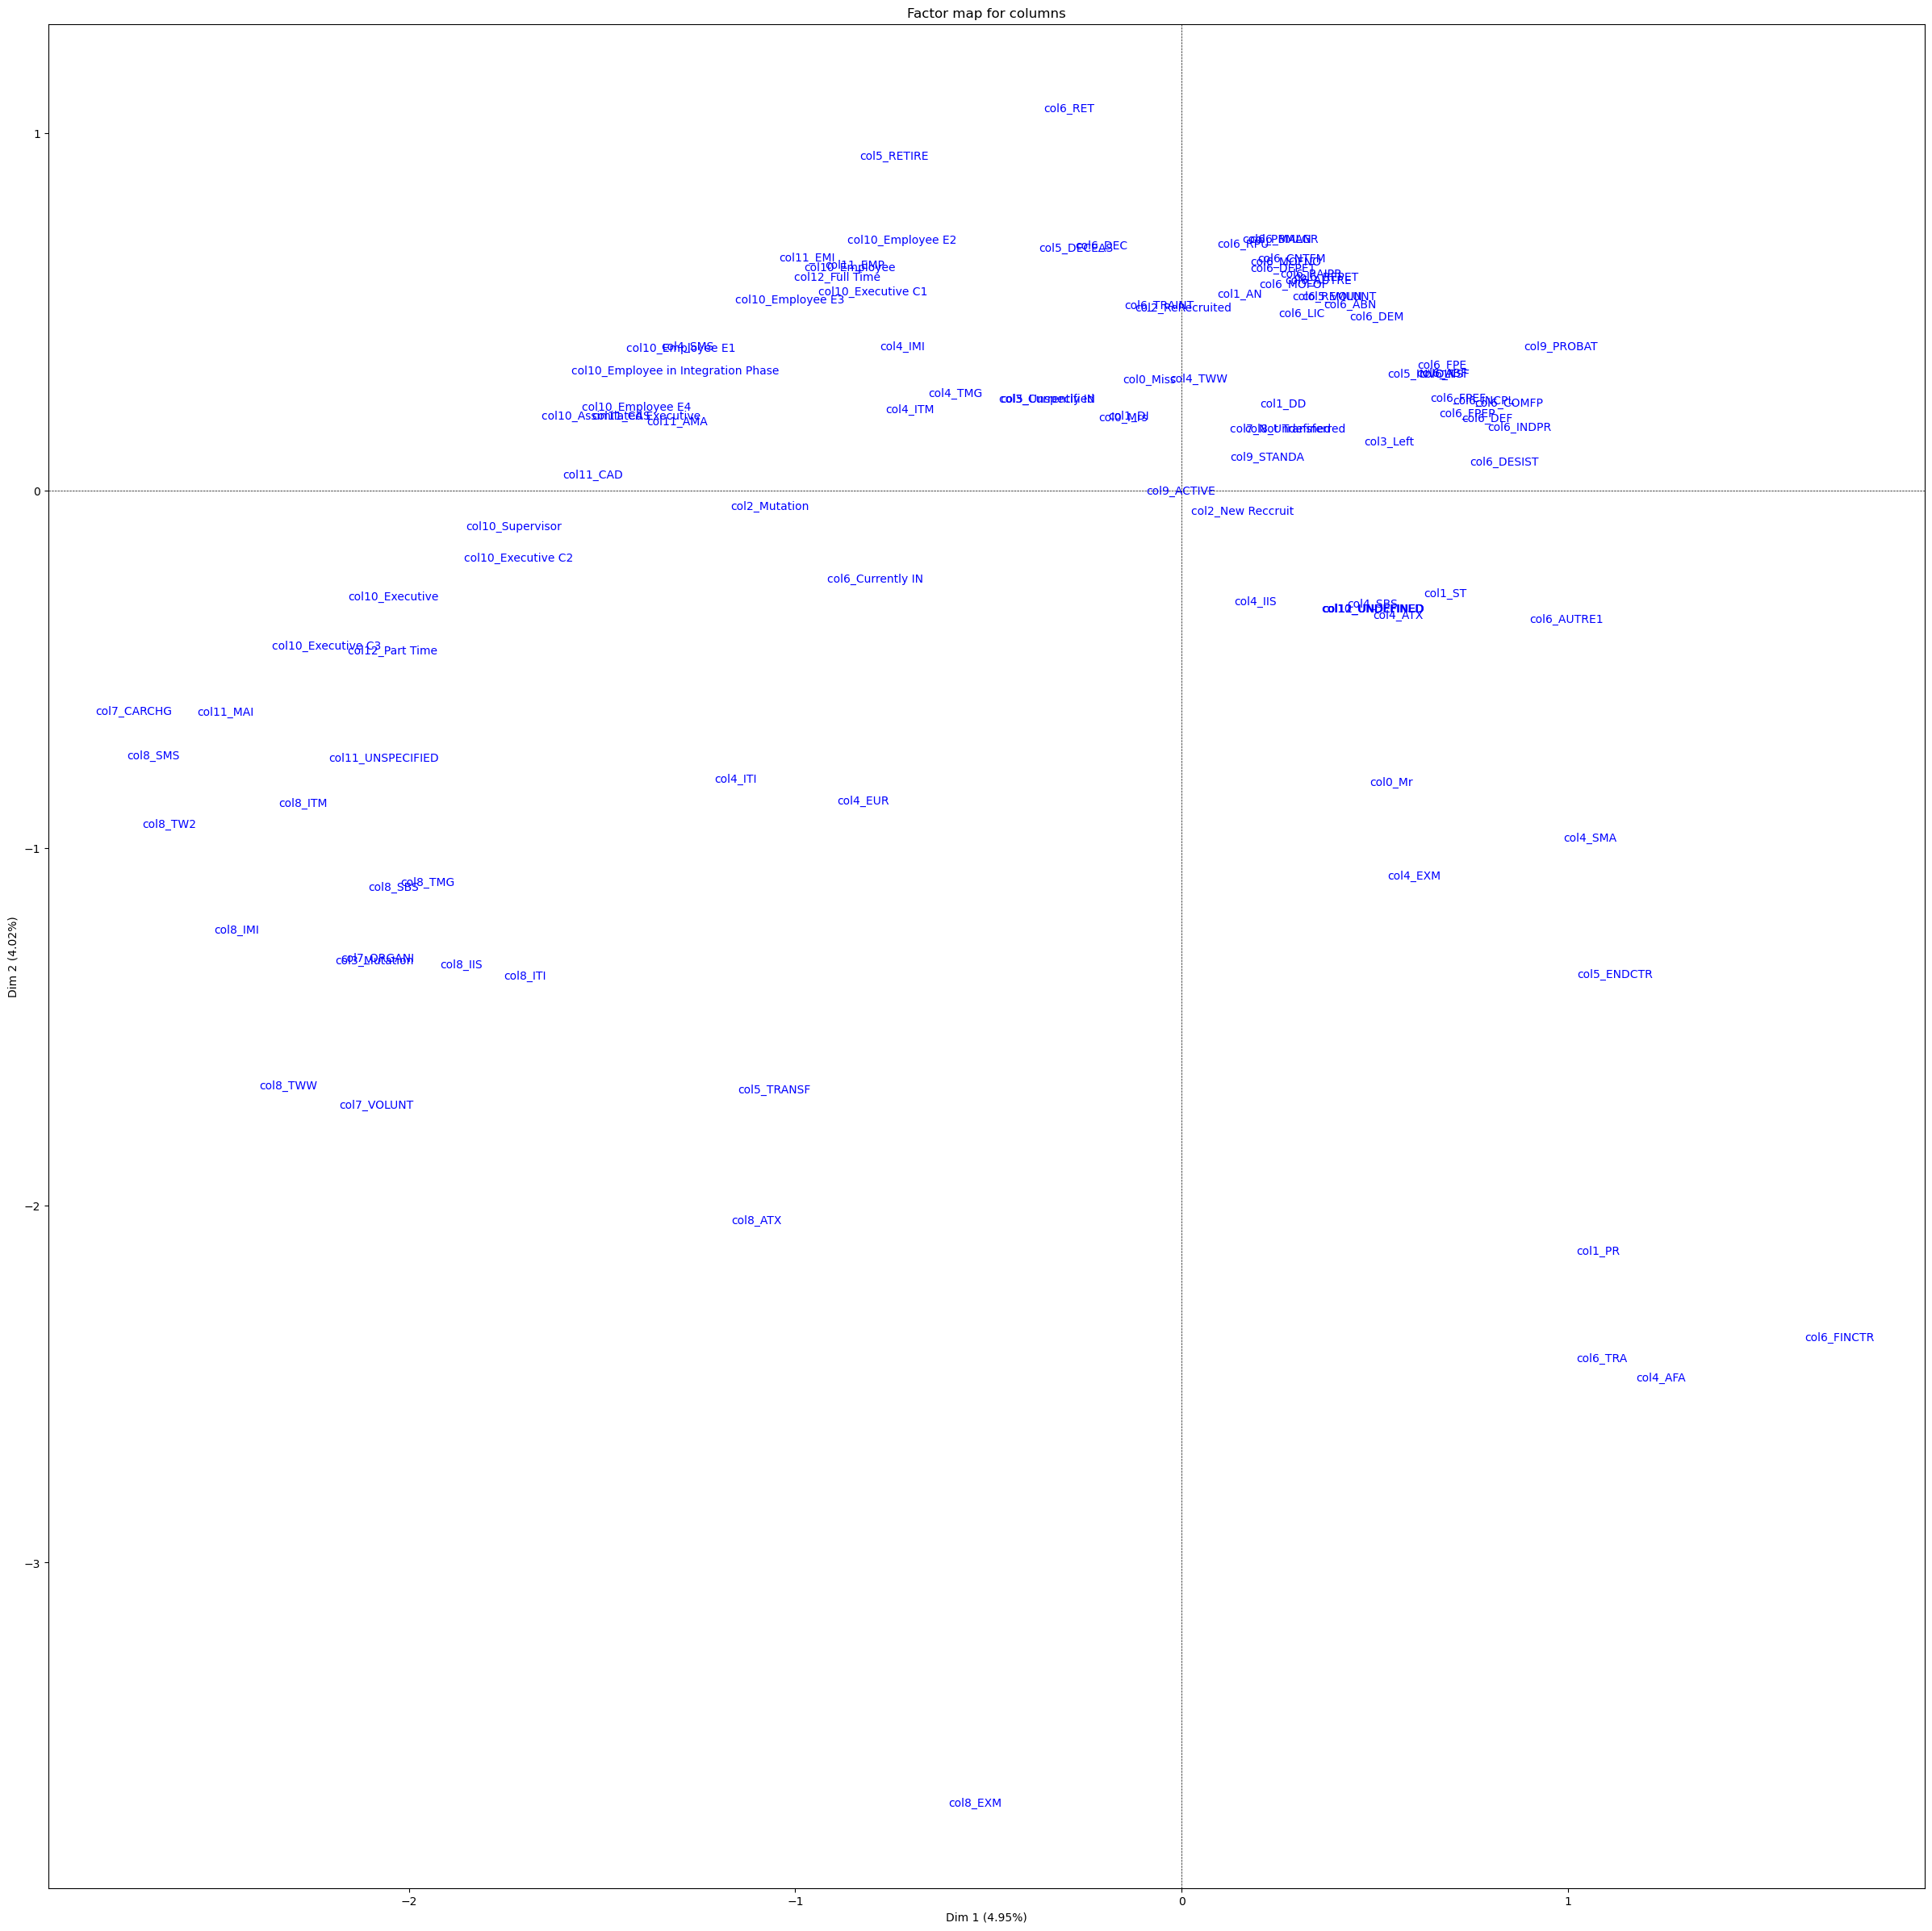

<Figure size 640x480 with 0 Axes>

In [105]:
my_mca.mapping_col(num_x_axis=1, num_y_axis=2, short_labels=False, figsize=(30, 30))
plt.savefig('Factor_Map_colNB_30.png')

In [106]:
fig = my_mca.mapping_col(num_x_axis=1, num_y_axis=2, short_labels=False, figsize=(100, 100))
plt.savefig('Factor_Map_colNB_100.png')

<Figure size 640x480 with 0 Axes>

______________________________________________________________________
**Interpretation**
- **TITLE** : Supervisor (AMA) is closest to **Transfer Reason** : Carrier Change & **Transfer Company** : TW2, SMS, and a bit farther : ITM, IMI
- **TITLE** : Executive c3 is closest to  **LIBELLE TRAVAIL** : Part Time (relatively to axis mutation)
- **TITLE** : Employee E1, Employee In Interation Phase are closest to **Original Company** : SMS
- **TITLE** : Employee E4 , Assimilated Executive and Supervisor are almost superposed.
- **TITLE** : Executive C2, Supervisor / CAD are closest to  Mutation
- **TITLE** : EMP & EMI, **Specific Title** : Employee E1, Employee E3, Executive C1, are closest to **LIBELLE TRAVAIL** : Full Time

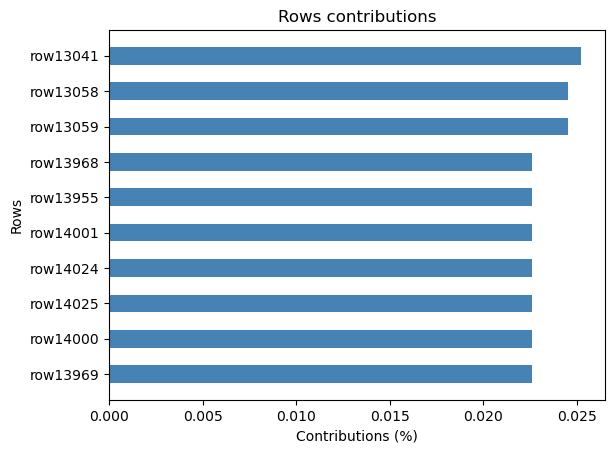

<Figure size 640x480 with 0 Axes>

In [107]:
my_mca.plot_row_contrib(num_axis=1, nb_values=10)
plt.savefig('Row_Contrib.png')

In [ ]:
#my_mca.mapping(1, 2, figsize=(100,100))
#plt.savefig('Final_Factor_Map_100.png')